In [1]:
import numpy as np
from pathlib import Path
import pandas as pd
from skimage import io
from scipy.stats import zscore

from utilities import Experiment

from matplotlib import pyplot as plt
%matplotlib notebook

import seaborn as sns
sns.set(style="ticks", palette="deep")
plt.style.use('v_arial')
c = sns.color_palette()

# Individual bout figure

In [2]:
exp = Experiment(r"J:\_Shared\stytra\manuscript\datasets\example_bout\181115_f10")

In [3]:
tail_log_df = exp.behavior_log.set_index("t")  # DataFrame with the tail trace
estm_log_df = exp.estimator_log.set_index("t")  # DataFrame with vigour estimator
stim_log_df = exp.stimulus_param_log.set_index("t")  # DataFrame with gratings data

t_slice = slice(188, 202)  # select stimulus time

<IPython.core.display.Javascript object>


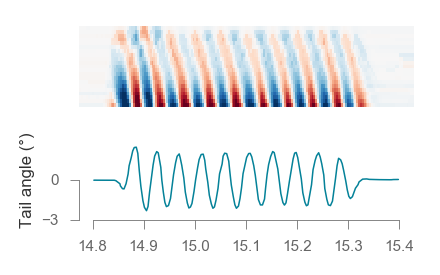

In [4]:
t_slice = slice(14.8, 15.4)


fig, axs = plt.subplots(2, figsize=(4,2.5))
l = 1.

plt.sca(axs[0])
plt.imshow(tail_log_df[t_slice].iloc[:, 5:].T, aspect="auto", vmin = -l, vmax = l,
           cmap = "RdBu")#sns.diverging_palette(220, 20, as_cmap=True))
# sns.despine(left=True, bottom=True, trim=True)
[plt.gca().spines[s].set_color(None) for s in ["left", "bottom"]]
plt.yticks([])
plt.xticks([])

plt.sca(axs[1])
plt.plot(tail_log_df["tail_sum"][t_slice], c=c[0])
# plt.gca().spines['bottom'].set_color(None)
plt.yticks([-3,0, 3])
plt.yticks([-3,0, 3])
plt.ylabel('Tail angle (°)')
# sns.despine(bottom=True, trim=True)

# plt.gca().spines['bottom'].set_color(None)
plt.yticks([-3,0])
# plt.ylabel('Tail angle (°)')
sns.despine(trim=True)
plt.tight_layout()

In [5]:
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['svg.fonttype'] = 'none'

fig.savefig("single_bout.svg", format="svg")

# OKR figure

In [47]:
from scipy.signal import detrend

In [48]:
exp = Experiment(r"J:\_Shared\stytra\manuscript\datasets\OKR\181106_f0")

In [49]:
eyes_log_df = exp.behavior_log.set_index("t")  # DataFrame with the tail trace

<IPython.core.display.Javascript object>


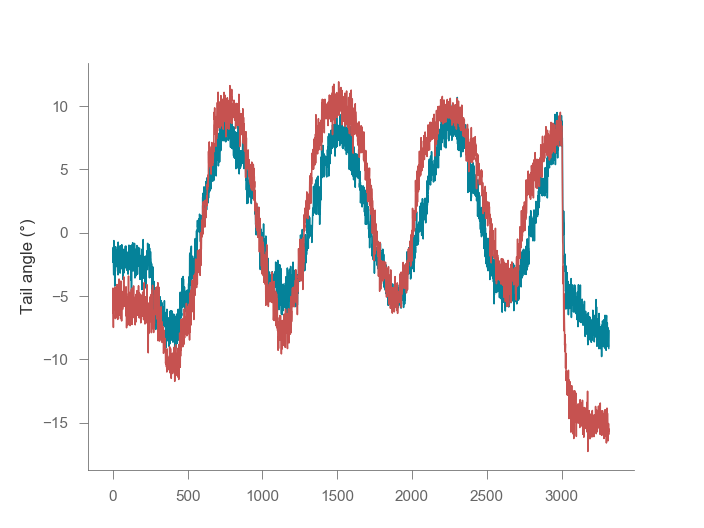

In [51]:
t_slice = slice(0, 25)
plt.figure(figsize=)

for i in range(2):
    col = "th_e{}".format(i)
    trace = eyes_log_df[col][t_slice].as_matrix()
    plt.plot(detrend(trace), c=c[i])
# plt.yticks([-3,0, 3])
plt.ylabel('Tail angle (°)')